<a href="https://colab.research.google.com/github/Waxpple/twitter_analysis/blob/master/Twitter_model_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk


In [0]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [4]:
!git clone https://github.com/MohamedAfham/Twitter-Sentiment-Analysis-Supervised-Learning.git

Cloning into 'Twitter-Sentiment-Analysis-Supervised-Learning'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 24 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [0]:
train_tweets = pd.read_csv('/content/Twitter-Sentiment-Analysis-Supervised-Learning/Data/train_csv_2.csv')
test_tweets = pd.read_csv('/content/Twitter-Sentiment-Analysis-Supervised-Learning/Data/test_csv_2.csv')

In [0]:
train_tweets = train_tweets[['label','tweet']]
test = test_tweets['tweet']

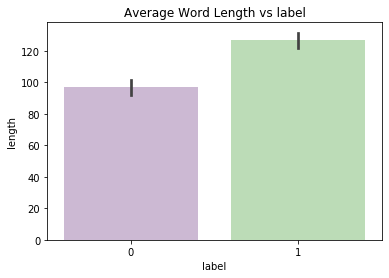

In [31]:

train_tweets['length'] = train_tweets['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = train_tweets,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

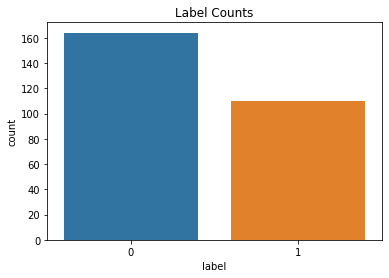

In [32]:
fig2 = sns.countplot(x= 'label',data = train_tweets)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

In [0]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [20]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [42]:
train_tweets[train_tweets['label']==1].drop('tweet',axis=1).head()


,label,length,tweet_list
3,1,140,"[RT, wake, call, child, school, ask, please, b..."
4,1,139,"[RT, AriDrennen, Remember, story, Starbucks, e..."
8,1,139,"[RT, AriDrennen, Remember, story, Starbucks, e..."
10,1,127,"[RT, lgbtqnation, Starbucks, fire, trans, mana..."
20,1,76,"[take, starbucks, never, first, place]"


In [0]:
train_tweets.to_csv(r'fitting.csv')

In [0]:
X = train_tweets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']

In [0]:
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

In [46]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7fb39e4d5c80>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [47]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89        41
           1       0.65      0.79      0.71        14

    accuracy                           0.84        55
   macro avg       0.78      0.82      0.80        55
weighted avg       0.85      0.84      0.84        55



[[35  6]
 [ 3 11]]
0.8363636363636363


In [48]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)
print(form_sentence('RT @seungweo: OP meet seungwoo, hangyul, and yuvin at starbucks and got their sign!!🤗 https://t.co/oSSKGMstqG'))
#print(train_tweets['tweet'].iloc[10])

RT seungweo OP meet seungwoo hangyul and yuvin at starbucks and got their sign 🤗 https t.co/oSSKGMstqG


In [14]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

print(no_user_alpha(form_sentence('RT @seungweo: OP meet seungwoo, hangyul, and yuvin at starbucks and got their sign!!🤗 https://t.co/oSSKGMstqG')))
#print(train_tweets['tweet'].iloc[10])

['RT', 'seungweo', 'OP', 'meet', 'seungwoo', 'hangyul', 'yuvin', 'starbucks', 'got', 'sign', 'https']


In [0]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'My grandpa unhappy'.split()
print(normalization(tweet_list))

In [0]:
pipeline.predict(['people', 'protest', 'trump', 'republican', 'trump', 'fuhered', 'amp'])

array([0, 0, 0, 0, 0, 0, 0])